# Graia MNIST digits example

In [11]:
#%pip install numpy
import numpy as np
# %pip install matplotlib
import matplotlib.pyplot as plt
# %pip install tensorflow
# %pip install keras
import keras

In [12]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

In [13]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [14]:
N = 100
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [15]:
model = Graia(inputs=28*28, layer_nodes=16, layers=3, outputs=10, learning_rate=0.1, relu_boost=1, seed=123456)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 13,216 parameters ready.


In [20]:
model.fit(train_images, train_labels, epochs=50)

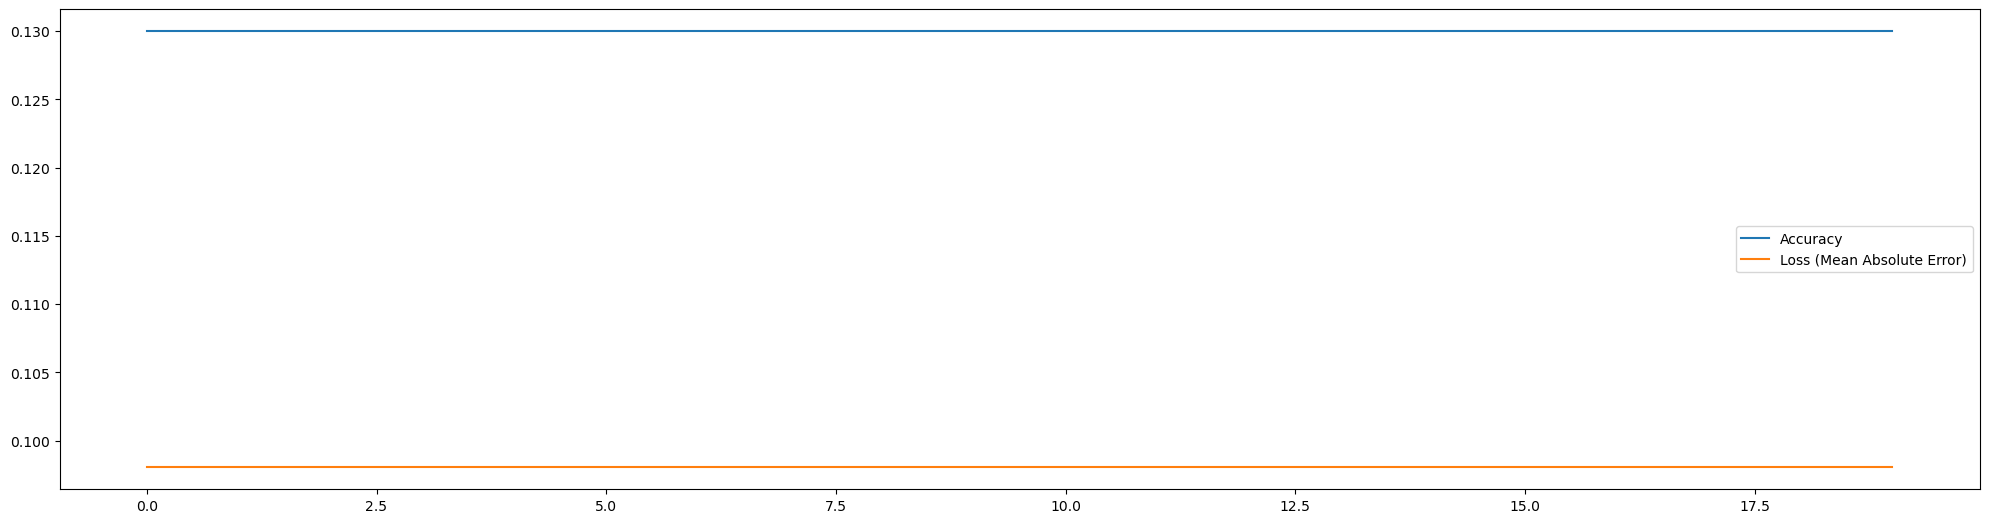

In [17]:
fig = plt.figure().add_axes([0,0,3,1])
fig.plot(model.history['accuracy'])
fig.plot(model.history['loss'])
plt.legend(["Accuracy", "Loss (Mean Absolute Error)"])
plt.show()

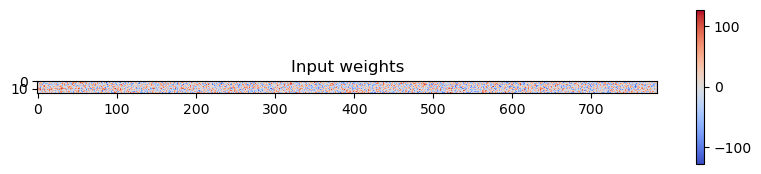

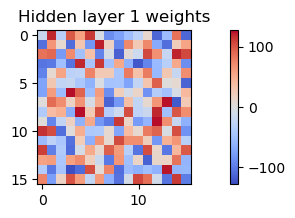

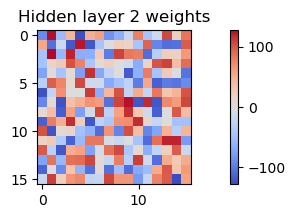

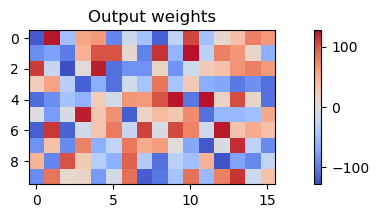

In [21]:
def show_weights(weights, title=None):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, vmin=-128, vmax=127, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.title(title)
    plt.show()

show_weights(model.input_weights, "Input weights")
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l], f"Hidden layer {l + 1} weights")
show_weights(model.output_weights, "Output weights")
# model.output_weights

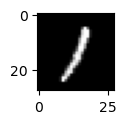

[0 0 0 1 0 0 3 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


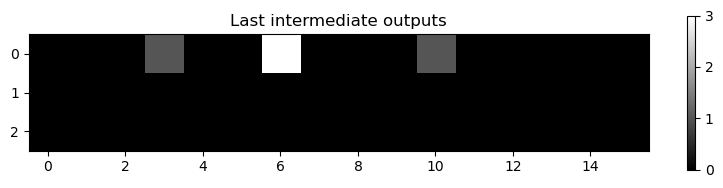

[0 0 0 0 0 0 0 0 0 0] --> 0


In [19]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.show()
for l in range(model.config["layers"]):
    print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="vertical")
plt.title("Last intermediate outputs")
plt.show()
print(model.last_outputs, "-->", model.last_answer)